<a href="https://colab.research.google.com/github/AGanguly13/AGanguly13/blob/main/CS352_2025_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 1 — (20 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). We should be able to evaluate the file to reproduce all output.
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file.
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip.
1. Submit this .zip file via Canvas

#### Run this code block 1st, to import likely needed packages

In [5]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

#### 1. (1 point) Explain, in your own words, how the cochlea detects and encodes the frequency and amplitude content of sound.

The cochlea detects and encodes the frequency and amplitude content of sound by decomposing sound waves into signals that is understandable to our brain. Specifically our cochlea does this by breaking down complex sound waves into individual sine waves that represent frequencies we can understand. The inside of the cochlea contains the basilar membrane which has different parts which are sensitive to different frequencies, so stronger vibrations means louder frequencies (i.e. Amplitude encoding). The hairs on that membrance vibrate at different locations based on the sound and create electrical signals which encode to our brain nerves what sound is being made (i.e. Frequency).

#### 2. (1 point) Explain at a high, functional level (no need to do the math) how we do the following: (1) transduce audio with a dynamic microphone into voltage. Then, explain at a high, functional level, how we: (2) encode the voltages from a microphone into CD-quality PCM digital audio and (3) determine the frequency content of the audio. How do the steps of this process relate to the one you described for how the ear works?

We transduce audio with a dynamic microphone into voltage by using a diaphragm, which is a thin material inside the mic that moves when hit with sound and is attached to a coil of wire in a magnetic field. The coil is moved back and forth when sound hits it, creating a voltage the shape of sound wave and thus transduces the audio. This is similar to the movement of an eardrum that is repsonding to sound passing through your ear.

We encode the voltages from a microphone into CD-quality PCM digital audio by measuring the voltages at regular time intervals, 44,100 Hz for a CD, and then quantize the measurements to the nearest number a computer can store, thus creating a stream encoded audio. This is similar to the nerves in your brain receiving signals from hairs in your basiliar membrane within the cochlea encoding sound into electrical signals.

We finally determine the frequency content of the audio by using a Fourier transformer to break up the audio into its frequency components and determine each frequency present and its relative strength. This is similar to how different parts of the basilar membrance in the cochlea vibrate based on different frequencies, allowing for distinction between frequencies in sound.

#### 3-A. (0.5 point)   The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Express in Hz the highest frequency sound you can represent (without aliasing) at each of these two sample rates. How do these frequencies compare to the highest frequency a typical human with no hearing loss can hear?

At a sample rate of 8000 Hz, the highest frequency of sound that can be represented is, based on Nyquist frequency, half the sample rate, so 4000Hz. Similarly for CD quality audio, it is 22,050 Hz.

The highest frequency a typical human with no hearing loss can hear is somewhere around 20,000 to 22,000 Hz based on class, so telephone audio is well below that while CD quality is right within that range.

#### 3-B. (0.5 point) Sample rate isn't the only difference between CD and telephone audio. Express in dB the dynamic range (range of loud to soft) of 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Use the formula for voltage dB (i.e.   $20*log_{10}(X/X_{ref})$ )  Show your work.  (Hint: what is the difference between the smallest number you can represent in 8 bits and the largest number?)

In [6]:
# assign your answers to these variables
range8 = None
range16 = None
range_diff = None
n_bits_human = None

### BEGIN SOLUTION
range8 = 20 * np.log10(2**8/1)
range16 = 20 * np.log10(2**16/1)
range_diff = range16 - range8
# human --> 130 = 20 * log10(2 ** n) --> n = 130 / 20 * log10(2)
n_bits_human = np.ceil(130 / (20 * np.log10(2)))

print(range8)
print(range16)
print(range_diff)
print(n_bits_human)
### END SOLUTION

48.16479930623699
96.32959861247399
48.16479930623699
22.0


#### 4. (1 point) Make a function to generate sinewaves.  Write a function to plot an audio signal and use it to display the generated sinewave. Label the figure's axes appropriately. Test the function for a simple case (e.g. a sinewave of frequency 10 Hz and length 1 sec, sampled at a rate of 100 Hz).


In [13]:
def make_sinewave(f, t, sr):
    """
    Parameters
    ----------
    f:  float
        Frequency of sine wave in Hz
    t:  float
        Duration in seconds
    sr: int
        Sample rate

    Returns
    -------
    np.ndarray
        Array of floats containing the signal
    """

    ### BEGIN SOLUTION
    x_axis = np.linspace(0, t, t * sr, endpoint=False)
    sine_wave = np.sin(2 * np.pi * f * x_axis)

    return sine_wave
    ### END SOLUTION

In [14]:
def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function

    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """

    ### BEGIN SOLUTION
    time_axis = np.arange(len(x)) / sr
    plt.figure(figsize=figsize)
    plt.plot(time_axis, x)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.title("Audio Signal Plotter")
    plt.show()
    ### END SOLUTION

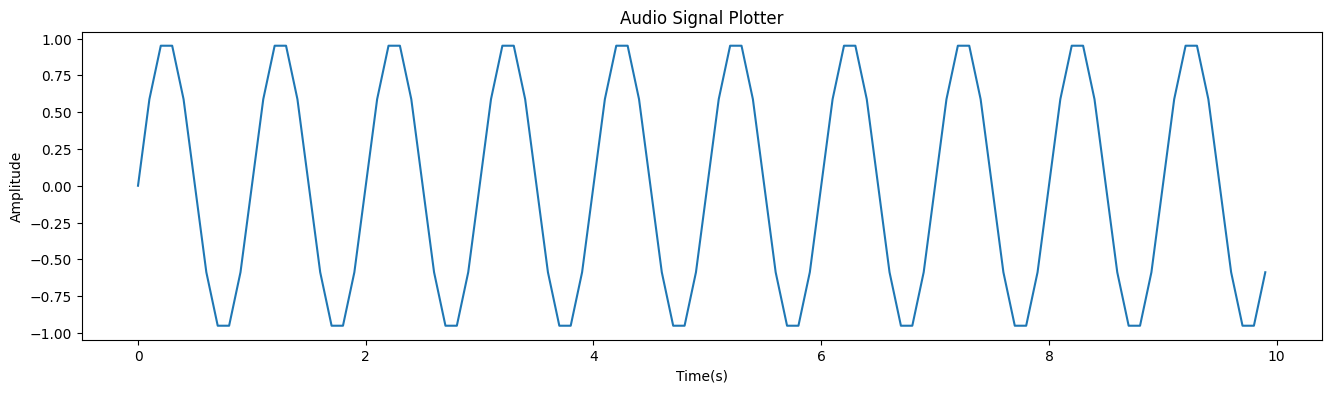

In [16]:
### BEGIN SOLUTION
signal = make_sinewave(10, 1, 100)
plot_audio(signal, 10)
### END SOLUTION

#### 5. (1 point) The case of the missing fundamental is where a sound seems to have a pitch that matches a fundamental frequency (also known as F0), but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0 (integer multiples of F0 are called harmonics). Write code to build an audio example that illustrates the case of the missing fundamental. Set F0 to be one octave below Middle C on the piano: 131 Hz. Make the following signals using this F0.

* sound 0: a harmonic sound with the first 10 harmonics (F0 through F9), where all harmonics have the same amplitude.

* sound 1: a signal with only F1 through F9.  

* sound 2: a signal with only odd harmonics (F1,F3,F5,F7,F9)

* sound 3: a signal with harmonics F1, F2, F3, F5, and F7

#### Which of these signals sounds to you like it has the same pitch as Signal 1. Which ones sound like they have a diffferent pitch? If a signal has a different pitch, what pitch (or pitches) do you hear?

**Your answer goes here**

In [ ]:

### BEGIN SOLUTION
# your code goes here
### END SOLUTION

# plot and play
plot_audio(soundseries, sr)
Audio(soundseries, rate=sr)

#### 6. (1 point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value (review the lecture on amplitude, slides no. 5-8).

In [ ]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    ### BEGIN SOLUTION
    # your code goes here
    ### END SOLUTION

#### 7. (1 point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Write code that does the following:
1. Make a sine wave at 440 Hz.  
1. Make a 2nd sine wave that is 30 dB softer and 430 Hz.
1. Play them simultaneusly.
1. Lower the frequency of the softer sine wave by 20 Hz.
1. Play the lowered frequency signal concurrently with the 440 Hz one.
1. Repeat the previous two steps.

Now listen to the results. At what frequency does it become really obvious that there are two distinct, simultaneous sine waves?  Now try it the other direction.  Make the softer tone at 450 Hz and vary it upward (maybe take 40 Hz steps, in the upward direction) each time. Now at what frequency does the softer tone become obvious when the softer tone gets higher instead of lower?

Do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.   

**Your answer goes here**

In [ ]:
### BEGIN SOLUTION
# your code goes here
### END SOLUTION
plot_audio(soundseries,sr)
Audio(soundseries, rate=sr)

## Using the Fourier transform

#### We're now going to look at using the Fourier transform to create representations for sound that let you analyze it and manipulate. The work you do in the following sections will be much easier if you use the fft and ifft functions from scipy.  See the following link for documentation on them.
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

#### 8. (one point) Let's look at a signal to see how the Fourier transform lets us understand it more easily. The choice of windowing function for your FFT is an important one. In this problem, we are going to investigate the effect of windowing on the spectra of sine waves. Write a function to compute and plot the log-magnitude spectrum of a signal. Your function must receive the number of samples as an input (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has).

In [ ]:
def audio_spectrum(sig, win_len, win_type, Nfft):
    """
    Computes the spectrum of an audio signal

    Parameters
    ----------
    sig: np.ndarray
        Audio signal
    win_len: int
        Length of the signal for spectrum computation (in samples)
    win_type: string
        Determines the window type including 'rectangular' and 'hann'
    Nfft: int
        Number of frequency-domain samples

   Returns
    -------
    a numpy array of the magnitude (absolute value) log spectrum.

    """
    ### BEGIN SOLUTION
    # your code goes here
    ### END SOLUTION

#### 9. (1 point) Make an audio signal composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now compute the spectrum of the signal using a rectangular window of length 64 samples. In this part we set the number of FFT points to the same value as the window length. Then compute the spectrum using a a Hann window (from scipy.signal). Plot both spectra on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly (horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

In [ ]:
### BEGIN SOLUTION
# your code goes here
### END SOLUTION

#### 10. (1 point) Which  windowing approach from the previous question gives a more accurate visualization of the signal contents, windowing the signal with a rectangular window or with a Hann window?  What is the underlying reason?

**Your answer goes here**


#### 11. (1 point)  When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal.  We're going to do that here. Do everything exactly like you did in question 9....except increase the number of FFT points (Nfft) to 256. Note...keep the window length win_len the same, just vary Nfft.

(aside: You can read more about the effect of zero-padding in the time domain  [here](http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html) and in the frequency domain [here](http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain))

#### What are some of differences you notice in this plot compared to the previous one?



**Your answer goes here**


In [ ]:
### BEGIN SOLUTION
# your code goes here
### END SOLUTION



#### 12. (1 point). What is the pitch (in Hz) of the lowest note played by an in-tune piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequencies of analysis of a fast Fourier transform (the fft function you call to make the spectrogram) results in a lowest (non-zero) frequency of analysis that is low enough to capture the lowest note on the piano.  Remember, the lowest non-zero frequency of analysis is going to be equal to the spacing between the frequencies of analysis.

In [ ]:
window_length = None
### BEGIN SOLUTION
# your code goes here
### END SOLUTION

#### 13. (2 points) Make a short term Fourier transform (STFT) function. Use the fft and hann functions from scipy. Do not use any preexisting STFT function.

In [ ]:
from scipy.fftpack import fft
from scipy.signal import hann

def stft(signal, window_size, hop_size, window_type = 'hann'):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array
    is windowed into a set of subarrays, each of length window_size. The distance between
    window centers (in samples) is given by hop_size. The type of window applied is
    determined by window_type. This returns a 2-D numpy array where the ith column
    is the FFT of the ith window. Each column contains an array of complex values.

    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    window_type: a string specifying one of two "hann" or "rectangular"

    Returns
    -------
    a 2D numpy array of complex numbers where the array column is the FFT of the ith window,
    and the jth element in the ith column is the jth frequency of analysis.
    """
    ### BEGIN SOLUTION
    # your code goes here
    ### END SOLUTION

#### 14. (2 points) Make an inverse STFT function to rebuild the original audio signal, using overlap & add resynthesis. You don't need to use a window function here.

Note: we are not using a synthesis window for this exercise. However, keep in mind that in general it's recommended to weight the inverse Fourier transform of each frame by the same window function used for generating the spectrogram at each step of overlap & add (a.k.a. weighted overlap & add). The synthesis window helps reducing the effect of impulsive noise caused by modifying the audio spectrogram.

See also https://ccrma.stanford.edu/~jos/sasp/Weighted_Overlap_Add.html

In [ ]:
from scipy.fftpack import ifft

def istft(X, hop_size):
    """
    Takes a 2-D numpy array representing an STFT of some signal, where stft[i]
    is the FFT of the ith window as input and stft[i,k] is the kth frequency of analysis.
    Performs an inverse FFT on each window and then does overlap & add resynthesis to rebuild
    the original signal the STFT was built from.

    Input Parameters
    ----------------
    X: a 2-D numpy array of complex numbers representing an STFT, where the ith
    column is the FFT of the ith window, and the jth row is the jth frequency of analysis.

    hop_size: an integer specifying the number of samples between the start of adjacent windows.

    Returns
    -------
    a 1-d numpy array of (possibly complex) values representing the original signal used to make X
    """
    ### BEGIN SOLUTION
    # your code goes here
    ### END SOLUTION

#### 15. (2 points) Write a test to show that your code in 13 and 14 works. One obvious thing that comes to mind is  performing the STFT on a sound, performing the inverse STFT and then measuring the difference between the original signal and the one that went through the STFT and inverse STFT. Being more specific I'd do something like this...

1. Make a signal you understand (e.g. a sinewave or two)
1. For each signal $s$, run it through stft and then istft, to generate a reconstruction $s'$
1. Measure the sum of squared errors (sse) between s and s' as follows $ sse = \sum_{n=1}^{N} (s(n)-s'(n))^2$
1. Plot it (ie plot both your $s$ and $s'$) to see the differences

<i>HINTS:

* The istft returns an array of complex values. As long as the imaginary component of all these values is really close to 0, you're fine. Just take the real portion of the numbers and use those.

* To numerically measure your reconstruction error, pick a rectangular window and a hop_size = window_size.

* If doing stft and then istft ends up making a signal a TOUCH shorter (i.e. the length of a hop, as measured in samples), that's OK. No more than that.

* If you make your hop size 1/2 your window size and pick the Hann window, you should see a little reconstruction error at the very beginning and the very end, but other than that, it should be perfect.  Try the Hann window with a hop size = window size and see how that looks.

* If you use rectangular windows with a hop size 1/2 your window size, signal reconstruction should be fine the very beginning and very end, but 2x louder throughout the middle.. Try the rectangular window with a hop size = window size and see how that looks.  
</i>





**Your results & analysis go here**


In [ ]:
### BEGIN SOLUTION
# your code goes here
### END SOLUTION


#### 16. (2 points) Write a function to display a magnitude spectrogram of an audio signal. Magnitude must be in dB. Correct frequencies must be displayed. Display only frequencies up to the Nyquist rate.  Time must be displayed in seconds. Frequency needs to be on the vertical dimension. Time must be on the horizontal dimension. Magnitude must be encoded by color/brightness. You cannot use any functions in librosa or Torch Audio to do this.  

#### In the 2nd code box (below), write a little test to display your spectrogram working. Make sure to COMMENT your code to explain what you're testing and why. Commenting is crucial here. You don't get full points for uncommented code.

<i>HINTS
* You may need to rotate your axes to get the visual results that we are looking for. Experiment with np.fliplr or np.rot90.
    
* To plot things, I used plt.pcolor and plot.colorbar.

* For visuzualization, it is often helpful to use the Hann window, instead of the rectangular one. It typically makes it easier to see the frequency content

</i>

In [ ]:
def spectrogram(signal, window_size, hop_size, sample_rate, window_type = 'hann', display = 1 ):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array
    is windowed into a set of subarrays, each of length window_size. The distance between
    window centers (in samples) is given by hop_size. The type of window applied is
    determined by window_type. This creates a 2-D numpy array where the ith column
    is the FFT of the ith window. Each column contains an array of complex values.
    It then creates a magnitude spectrogram of the signal and plots it on the screen.
    Here, the vertical dimension is frequency (in Hz), the horizontal dimension is time
    (in seconds), brightness corresponds to amplitude (in dB). Only frequencies up to
    the Nyquist rate are displayed.

    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    sample_rate: an integer giving the sample rate of the input signal, in Hz
    window_type: a string specifying one of two "hann" or "rectangular"
    display: an integer. If set to 1, it plots the spectrogram. Else it does not.

    Returns
    -------
    an output tuple with 3 items

    sgram:  a 2-D numpy array of real-valued numbers that contains the magnitude spectrogram
           sgram[t,f] is the magnitude at time t and frequency f. This only contains values
           up to the nyquist frequency
    times: a 1-D numpy array of non-negative real-values that gives the times,
           times[t] gives the start time of the tth window in seconds
    freqs: a 1-D numpy array  of non-negative real values. freqs[f] gives the fth
           frequency of analysis in Hz, up to the nyquist frequency

    Calling Example
    ---------------
    sgram,times,freqs = spectrogram(signal, window_size, hop_size, sample_rate )

    """
    ### BEGIN SOLUTION
    ### END SOLUTION

In [ ]:
# The test case goes here
### BEGIN SOLUTION
# your code goes here
### END SOLUTION